# BUSINESS UNDERSTANDING

We at K-Means Kapital ltd have been tasked with a dataset from a leading telecommunications provider who is undergoing some challenges and would wish to us to conduct an analysis from their customer data.

The challenge that Syriatel is facing s that they are losing customers and ultimately impacting their revenues. 

What we shall do for this data is to conduct an analysis on the usage trends and ultimately help predict potentially exiting customers that way they may be able to have a better picture of their busness health going forward.

# PROBLEM STATEMENT

With the provided variables(though only the necessary ones shall be picked), 

('state','account length','area code','phone number','international plan','voice mail plan','number vmail messages','total day minutes','total day calls','total day charge','total eve minutes','total eve calls','total eve charge','total night minutes','total night calls','total night charge','total intl minutes','total intl calls','total intl charge','customer service calls','churn')

We aim to conduct an anlaysis provide a model to help them reduce churn and retain clientelle 

# OBJECTIVES

#### 1.
Build a regression model to;

1. predict churn rate
2. determine the most influential variables
3. improve predictive accuracy

#### 2.
Build a classification model to predict the churn rate 

# DATA UNDERSTANDING

In [107]:
#Let's load some essential modules for the initial steps
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [108]:
df = pd.read_csv('syriatel.csv')
df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [109]:
#getting summary statistics on the columns
df.describe()

account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

In [110]:
#getting information on the columns data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

From the above we can determine that;
1. Our data contains 3,333 entries(rows)
2. 21 columns in total (4 objects, 1 bool, 8 floats, 8 int columns)

# DATA CLEANING & PREPARATION 

### Handling NAs & Duplicates

In [111]:
#let's check for missing values
print(df.isna().sum())
print(f'Duplicated values are:  ',{df.duplicated().sum()})

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64
Duplicated values are:   {0}


We have no missing data points which is good as we can assume that the data is complete and can get insights without having to worry about values to add.

We have no duplicated values and as such we can proceed.

### Droping unncessary columns

In [112]:
#we have selected the three columns below as these are identifiers and would not carry much weight in the analysis
df.drop(columns=['area code','phone number','state'],inplace=True)

### Feature Engineering

# EXPLORATORY DATA ANALYSIS (EDA)

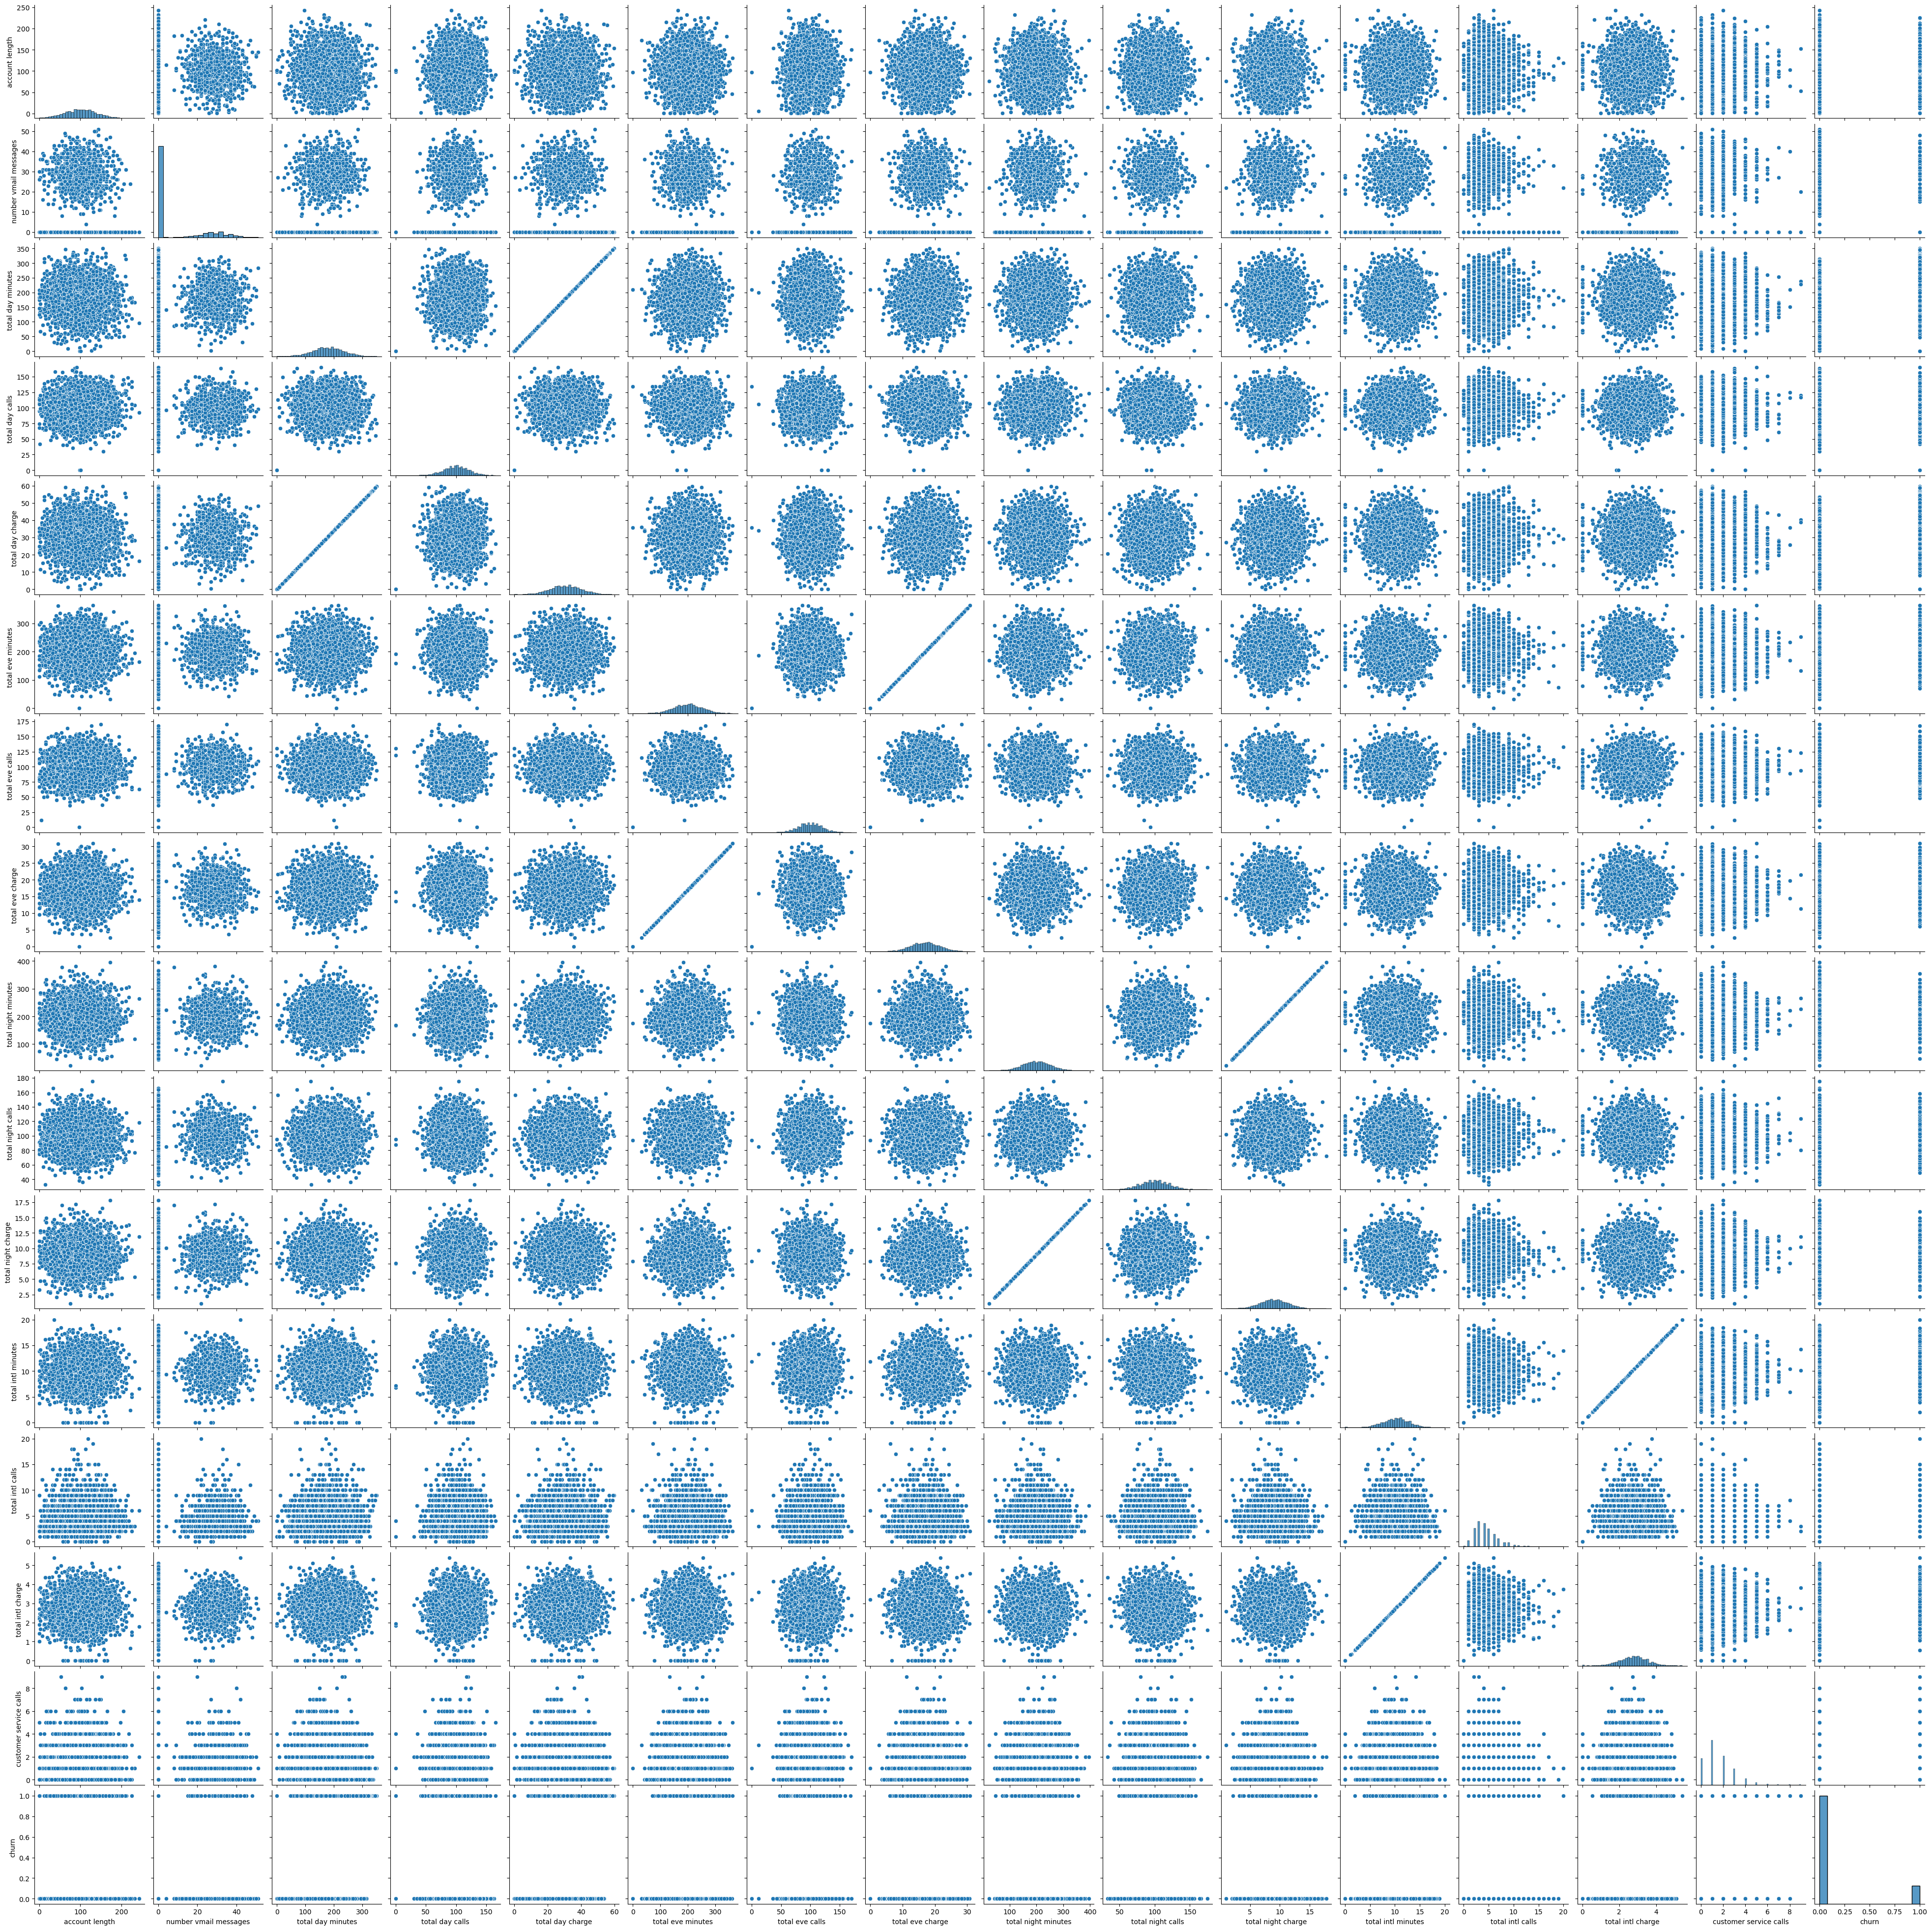

In [113]:
#lets perform a pair plot to get an overview of the relationships between the variables
sns.pairplot(df)

In [114]:
#check for unique values in the columns
df.nunique()

account length             212
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

##### let's visualize the unique values in the categorical variables, i.e the ones with the least number of unique variables.

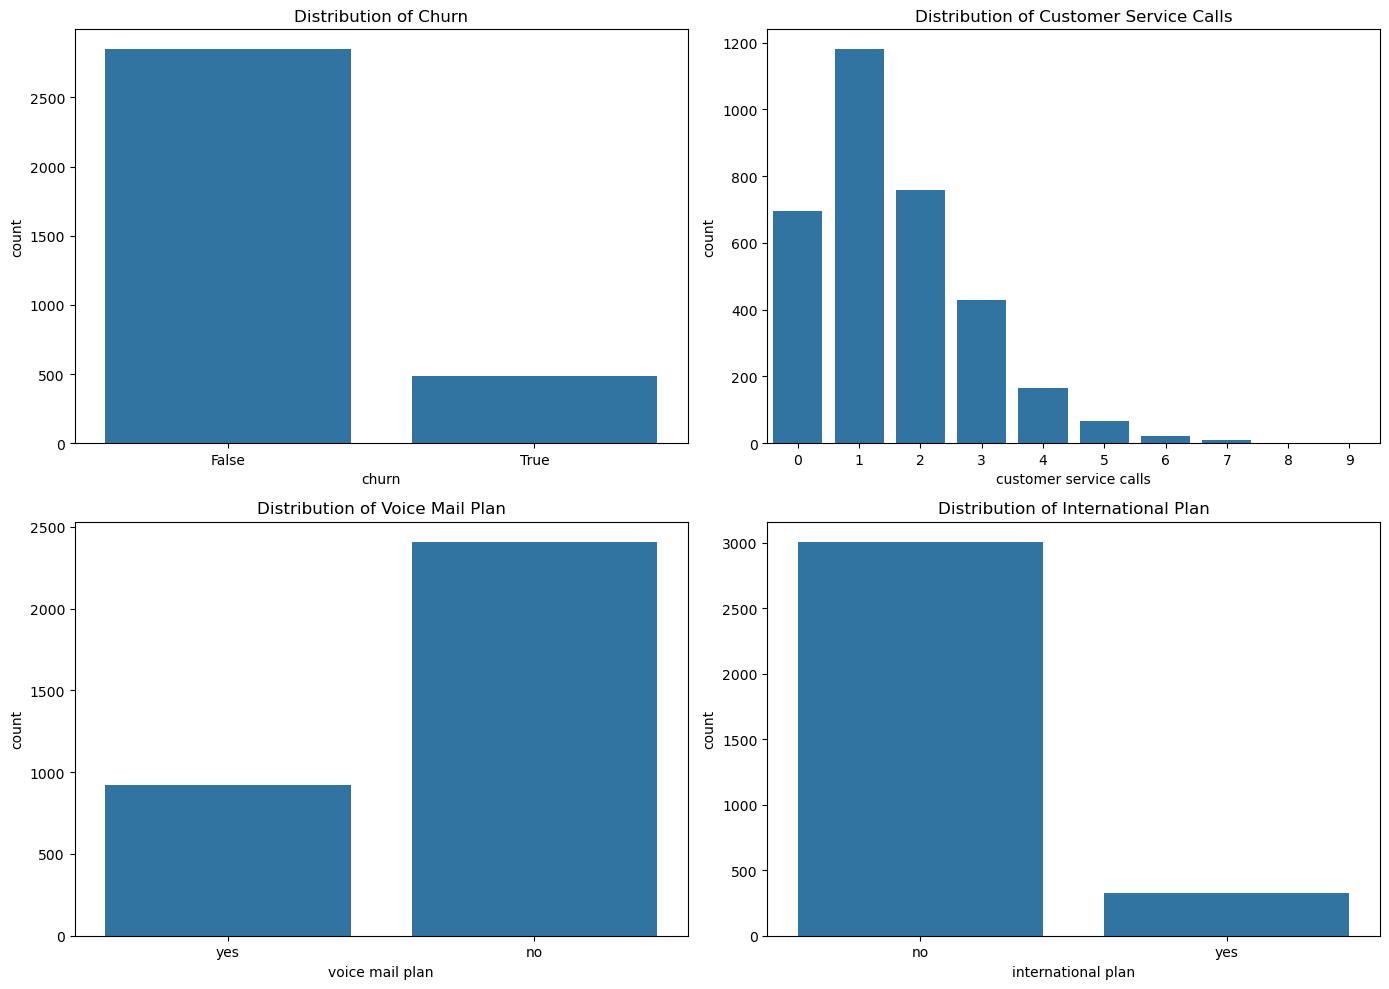

In [115]:

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot for churn
sns.countplot(ax=axes[0, 0], x='churn', data=df)
axes[0, 0].set_title('Distribution of Churn')

# Plot for customer service calls
sns.countplot(ax=axes[0, 1], x='customer service calls', data=df)
axes[0, 1].set_title('Distribution of Customer Service Calls')

# Plot for voice mail plan
sns.countplot(ax=axes[1, 0], x='voice mail plan', data=df)
axes[1, 0].set_title('Distribution of Voice Mail Plan')

# Plot for international plan
sns.countplot(ax=axes[1, 1], x='international plan', data=df)
axes[1, 1].set_title('Distribution of International Plan')

plt.tight_layout()
plt.show()

In [116]:
x= ['churn','voice mail plan','international plan','customer service calls']

#to check the distribution
for i in x:
    print(df[i].value_counts())


churn
False    2850
True      483
Name: count, dtype: int64
voice mail plan
no     2411
yes     922
Name: count, dtype: int64
international plan
no     3010
yes     323
Name: count, dtype: int64
customer service calls
1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: count, dtype: int64


From the above plot and value count analysis we can see that out of 3,333 customers;
1. Churn - (2850 remained , 483 left)
2. Voicemail Plan - (922 have it, 2411 don't)
3. International plan - (323 have it, 3010 don't)
4. Customer service calls - (about 20% of clientelle haven't made a call but most issues appear to be solved by the third/fourth call or these could be different scenario calls.)

In [117]:
print('As percentages of the total')
#to check the percentages
for i in x:
    print(df[i].value_counts(normalize=True)*100)

As percentages of the total
churn
False    85.508551
True     14.491449
Name: proportion, dtype: float64
voice mail plan
no     72.337234
yes    27.662766
Name: proportion, dtype: float64
international plan
no     90.309031
yes     9.690969
Name: proportion, dtype: float64
customer service calls
1    35.433543
2    22.772277
0    20.912091
3    12.871287
4     4.980498
5     1.980198
6     0.660066
7     0.270027
9     0.060006
8     0.060006
Name: proportion, dtype: float64


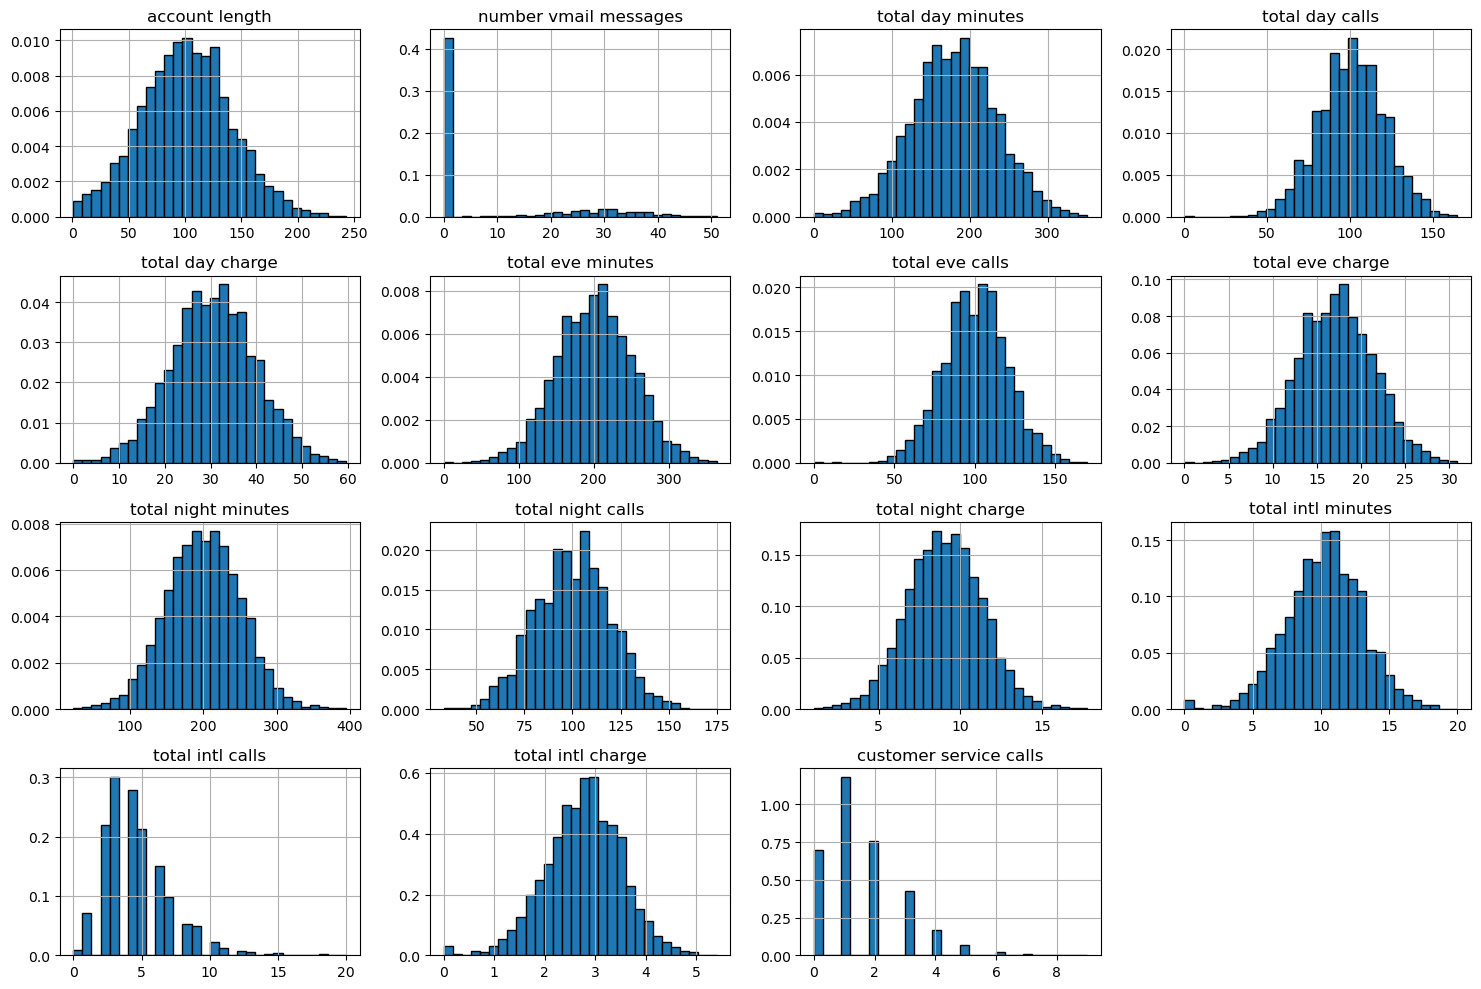

In [118]:
# Plot histograms for each numerical column
df.hist(bins=30, figsize=(15, 10), density=True, edgecolor='black')
plt.tight_layout()
plt.show()

From the above we can see normal distribution in the following columns;
1. account length is normally distributed - 1 
2. total international (calls, charge,minutes) are normarlly distributed - 3
3. total night (minutes, calls, and charge) are normally distributed - 3
4. total evening (minutes, calls, and charge) are normally distributed - 3
5. total day (minutes, calls, and charge) are normally distributed - 3

** These normally distributed values may come in handy later in the analysis **

### Univariate Analysis

In [119]:
#Let's generate a correllation matrix to better understand the relationship between our variables.
corr_matrix = df.select_dtypes(include='number').corr()
corr_matrix

account length  number vmail messages  \
account length                1.000000              -0.004628   
number vmail messages        -0.004628               1.000000   
total day minutes             0.006216               0.000778   
total day calls               0.038470              -0.009548   
total day charge              0.006214               0.000776   
total eve minutes            -0.006757               0.017562   
total eve calls               0.019260              -0.005864   
total eve charge             -0.006745               0.017578   
total night minutes          -0.008955               0.007681   
total night calls            -0.013176               0.007123   
total night charge           -0.008960               0.007663   
total intl minutes            0.009514               0.002856   
total intl calls              0.020661               0.013957   
total intl charge             0.009546               0.002884   
customer service calls       -0.003796              -0.013263   

                        total day minutes  total day calls  total day charge  \
account length                   0.006216         0.038470          0.006214   
number vmail messages            0.000778        -0.009548          0.000776   
total day minutes                1.000000         0.006750          1.000000   
total day calls                  0.006750         1.000000          0.006753   
total day charge                 1.000000         0.006753          1.000000   
total eve minutes                0.007043        -0.021451          0.007050   
total eve calls                  0.015769         0.006462          0.015769   
total eve charge                 0.007029        -0.021449          0.007036   
total night minutes              0.004323         0.022938          0.004324   
total night calls                0.022972        -0.019557          0.022972   
total night charge               0.004300         0.022927          0.004301   
total intl minutes              -0.010155         0.021565         -0.010157   
total intl calls                 0.008033         0.004574          0.008032   
total intl charge               -0.010092         0.021666         -0.010094   
customer service calls          -0.013423        -0.018942         -0.013427   

                        total eve minutes  total eve calls  total eve charge  \
account length                  -0.006757         0.019260         -0.006745   
number vmail messages            0.017562        -0.005864          0.017578   
total day minutes                0.007043         0.015769          0.007029   
total day calls                 -0.021451         0.006462         -0.021449   
total day charge                 0.007050         0.015769          0.007036   
total eve minutes                1.000000        -0.011430          1.000000   
total eve calls                 -0.011430         1.000000         -0.011423   
total eve charge                 1.000000        -0.011423          1.000000   
total night minutes             -0.012584        -0.002093         -0.012592   
total night calls                0.007586         0.007710          0.007596   
total night charge              -0.012593        -0.002056         -0.012601   
total intl minutes              -0.011035         0.008703         -0.011043   
total intl calls                 0.002541         0.017434          0.002541   
total intl charge               -0.011067         0.008674         -0.011074   
customer service calls          -0.012985         0.002423         -0.012987   

                        total night minutes  total night calls  \
account length                    -0.008955          -0.013176   
number vmail messages              0.007681           0.007123   
total day minutes                  0.004323           0.022972   
total day calls                    0.022938          -0.019557   
total day charge                   0.004324           0.022972   
total eve minutes        

<Axes: >

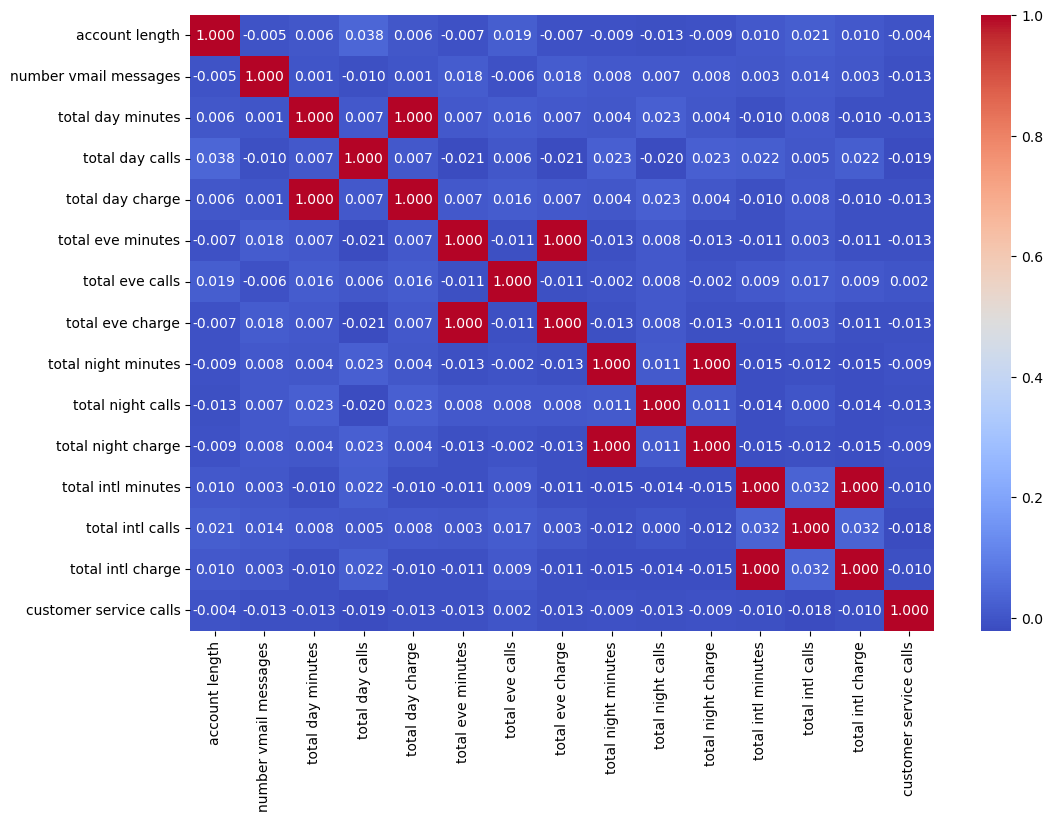

In [120]:
#Because the above data is cramped, let's visualize the same.
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.3f')

<Axes: >

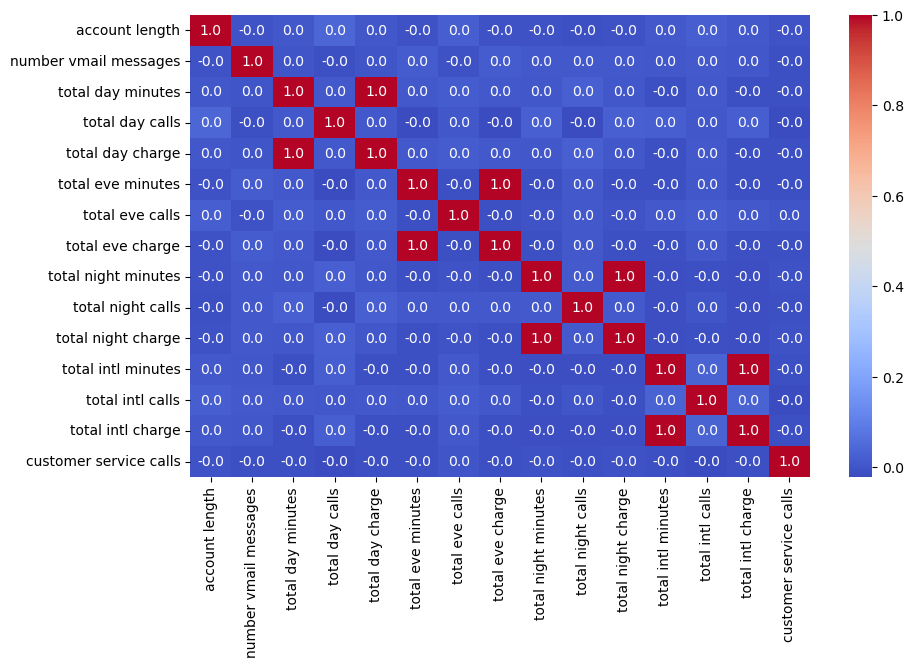

In [121]:
#Let' redo the above but with a single decimal place to better see those that stand out.
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.1f')


From the above we can see that their are practically no correlations between the numeric variables.

### Bi-Variate Analysis

We shall work with the churn column vs customer service, international plan and voice mail plan and account duration

Churn vs customer service calls

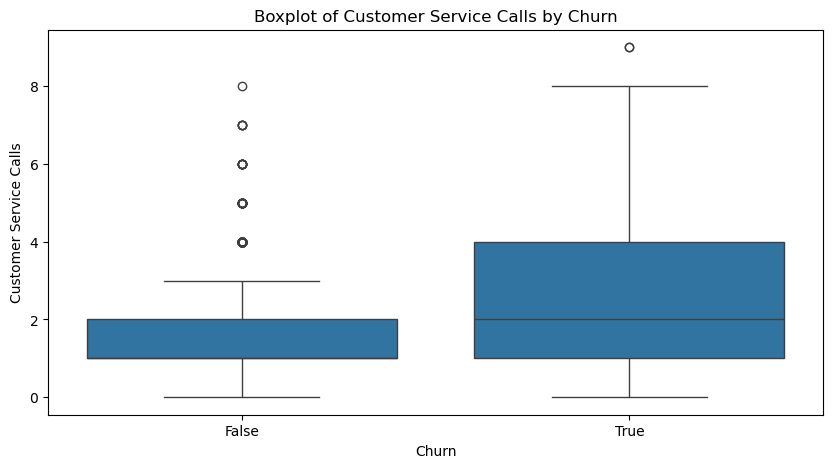

In [127]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='churn', y='customer service calls')
plt.title('Boxplot of Customer Service Calls by Churn')
plt.xlabel('Churn')
plt.ylabel('Customer Service Calls')
plt.show()

In [123]:
df[['churn', 'customer service calls']].corr()


churn  customer service calls
churn                   1.00000                 0.20875
customer service calls  0.20875                 1.00000

From the above we can deduce that the customers that left had complaints that were raised with the customer care desk, this also points to a 20% correlation between calls and churn

Churn vs. International plan

In [130]:
#We need to change the format for international plan column and create a new column as we can't correalte yes and no columns 
df['international plan1'] = df['international plan'].map({'yes': 1, 'no': 0})

#to do the correaltion
df[['churn', 'international plan1']].corr()


churn  international plan1
churn                1.000000             0.259852
international plan1  0.259852             1.000000

As we can see above there is a greater correlation between the churn from the customers with international plans comin in at 25%, we could potentially say that maybe they found better costs but further analysis required.

Churn vs voicemail plan

In [137]:
#We need to change the format for voice mail plan column and create a new column as we can't correalte yes and no columns 
df['voice mail plan1'] = df['voice mail plan'].map({'yes': 1, 'no': 0})

#to do the correaltion
df[['churn', 'voice mail plan1']].corr()

churn  voice mail plan1
churn             1.000000         -0.102148
voice mail plan1 -0.102148          1.000000

At -10% correlation, we can positively conclude that voice mail plan is not a deciding factor on the churn and as such we shall not draw conclusions from this 

Churn vs account length

In [138]:
#We shall assume that account length refers to months on the service.

#to do the correaltion
df[['churn', 'account length']].corr()

churn  account length
churn           1.000000        0.016541
account length  0.016541        1.000000

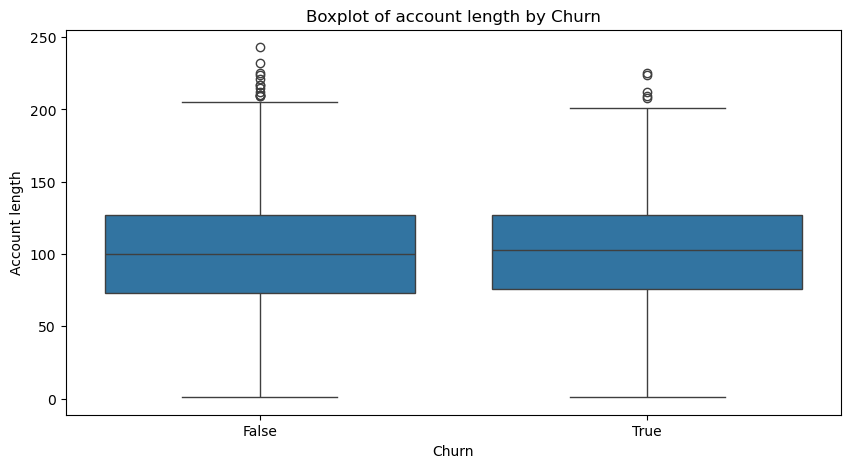

In [139]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='churn', y='account length')
plt.title('Boxplot of account length by Churn')
plt.xlabel('Churn')
plt.ylabel('Account length')
plt.show()

From the above analysis, we can further proceed to conclude that the duration of the account does  not affect churn and as such customer loyalty isn't an influential factor in this case with only a 1.6% correlation

### Multi-variate Analysis

# PRE-PROCESSING

In [142]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   international plan      3333 non-null   object 
 2   voice mail plan         3333 non-null   object 
 3   number vmail messages   3333 non-null   int64  
 4   total day minutes       3333 non-null   float64
 5   total day calls         3333 non-null   int64  
 6   total day charge        3333 non-null   float64
 7   total eve minutes       3333 non-null   float64
 8   total eve calls         3333 non-null   int64  
 9   total eve charge        3333 non-null   float64
 10  total night minutes     3333 non-null   float64
 11  total night calls       3333 non-null   int64  
 12  total night charge      3333 non-null   float64
 13  total intl minutes      3333 non-null   float64
 14  total intl calls        3333 non-null   

In [126]:
#let's create lists to split the numerical and object columns

numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
object_cols = df.select_dtypes(exclude=np.number).columns.tolist()

print("Numerical columns:", numeric_cols)
print('Object columns:', object_cols)

Numerical columns: ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']
Object columns: ['international plan', 'voice mail plan', 'churn']


### Encoding

We shall work on the object columns to enable us conduct modeling


In [ ]:
df[object_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   international plan  3333 non-null   object
 1   voice mail plan     3333 non-null   object
 2   churn               3333 non-null   bool  
dtypes: bool(1), object(2)
memory usage: 55.5+ KB


In [146]:
#let's check for the unique variable in each column to enable us decide which encoding we shall applyh to the columns

for i in object_cols:
  print(f'The variable "{i}" has {df[i].nunique()} variables: {df[i].unique()} \n')

The variable "international plan" has 2 variables: ['no' 'yes'] 

The variable "voice mail plan" has 2 variables: ['yes' 'no'] 

The variable "churn" has 2 variables: [False  True] 



From the above our work is cut out for us and we shall proceed to use label encoding for the above columns

In [147]:
#lets make a copy that way we do not tamper with the original data
df_encoded = df.copy()

In [148]:
#we shall first begin with the boolean column 
# Convert boolean columns to numeric (0 and 1)
for col in df_encoded.select_dtypes(include='bool'):
    df_encoded[col] = df_encoded[col].astype(int)
df_encoded.head()

account length international plan voice mail plan  number vmail messages  \
0             128                 no             yes                     25   
1             107                 no             yes                     26   
2             137                 no              no                      0   
3              84                yes              no                      0   
4              75                yes              no                      0   

   total day minutes  total day calls  total day charge  total eve minutes  \
0              265.1              110             45.07              197.4   
1              161.6              123             27.47              195.5   
2              243.4              114             41.38              121.2   
3              299.4               71             50.90               61.9   
4              166.7              113             28.34              148.3   

   total eve calls  total eve charge  total night minutes  total night calls  \
0               99             16.78                244.7                 91   
1              103             16.62                254.4                103   
2              110             10.30                162.6                104   
3               88              5.26                196.9                 89   
4              122             12.61                186.9                121   

   total night charge  total intl minutes  total intl calls  \
0               11.01                10.0                 3   
1               11.45                13.7                 3   
2                7.32                12.2                 5   
3                8.86                 6.6                 7   
4                8.41                10.1                 3   

   total intl charge  customer service calls  churn  international plan1  \
0               2.70                       1      0                    0   
1               3.70                       1      0                    0   
2               3.29                       0      0                    0   
3               1.78                       2      0                    1   
4               2.73                       3      0                    1   

   voice mail plan1  
0                 1  
1                 1  
2                 0  
3                 0  
4                 0

In [152]:
#now let's handle the plan columns
df_encoded['international plan'] = df_encoded['international plan'].map({'no': 0, 'yes': 1})

df_encoded['voice mail plan'] = df_encoded['voice mail plan'].map({'no': 0, 'yes': 1})

In [154]:
# to check it worked

for i in object_cols:
  print(f'The variable "{i}" has {df_encoded[i].nunique()} variables: {df_encoded[i].unique()} \n')


The variable "international plan" has 2 variables: [0 1] 

The variable "voice mail plan" has 2 variables: [1 0] 

The variable "churn" has 2 variables: [0 1] 



We have successfully encoded the variables and we can now proceed over to scaling.

### Scaling

# MODELING

### Regression

# CLASSIFICATION

### Logistic Regression

### Random Forest Classifier

### Decision Tree Classifier

# HYPER_PARAMETER TUNING

# MODEL EVALUATION

# CONCLUSION & RECCOMENDATION